In [1]:
import numpy as np
import pandas as pd 
import pickle as pkl
import os
import sys
import math
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics import *
from sklearn import svm
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Stock datasets

In [120]:
amznStock = pd.read_csv('AMZN.csv')[['Date','Close']]
amznStock.Date = pd.to_datetime(amznStock.Date)
fbStock = pd.read_csv('FB.csv')[['Date','Close']]
fbStock.Date = pd.to_datetime(fbStock.Date)
wmtStock = pd.read_csv('WMT.csv')[['Date','Close']]
wmtStock.Date = pd.to_datetime(wmtStock.Date)
dnbStock = pd.read_csv('DNB.csv')[['Date','Close']]
dnbStock.Date = pd.to_datetime(dnbStock.Date)
pfeStock = pd.read_csv('PFE.csv')[['Date','Close']]
pfeStock.Date = pd.to_datetime(pfeStock.Date)

print(amznStock.Date.iloc[-1] - amznStock.Date.iloc[3778], len(amznStock.iloc[3778:]))
print (fbStock.Date.iloc[-1] - fbStock.Date.iloc[0], len(fbStock))
print (wmtStock.Date.iloc[-1] - wmtStock.Date.iloc[10024], len(wmtStock.iloc[10024:]))
print (pfeStock.Date.iloc[-2] - pfeStock.Date.iloc[10084], len(pfeStock.iloc[10084:]))
print (dnbStock.Date.iloc[-2] - dnbStock.Date.iloc[7300], len(dnbStock.iloc[7300:]))

2282 days 00:00:00 1573
2282 days 00:00:00 1573
2282 days 00:00:00 1573
2282 days 00:00:00 1574
2282 days 00:00:00 1574


In [121]:
amznStock = amznStock.iloc[3778:].reset_index()
#amznStock.drop(amznStock.columns[0])
wmtStock = wmtStock.iloc[10024:].reset_index()
pfeStock = pfeStock.iloc[10084:-1].reset_index()
dnbStock = dnbStock.iloc[7300:-1].reset_index()

tempStock = pd.concat([amznStock[['Date','Close']],fbStock['Close']],axis=1)
tempStock = pd.concat([tempStock,wmtStock['Close']],axis=1)
tempStock = pd.concat([tempStock,pfeStock.Close],axis=1)
tempStock = pd.concat([tempStock,dnbStock.Close],axis=1)
tempStock.columns = ['Date','AMZN','FB','WMT','PFE','DNB']

1090


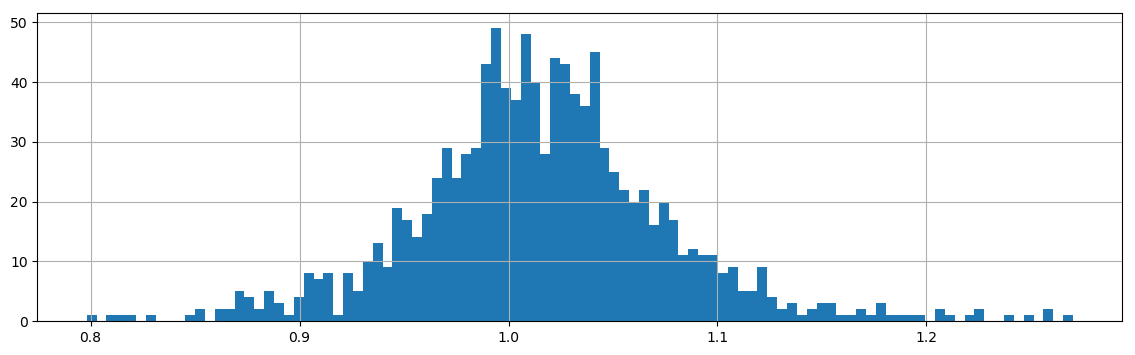

1.0764424284384404 0.061093334020073 1.0153490944183674 1.0133718371629137 ModeResult(mode=array([0.79811129]), count=array([1]))
657 433
1.0514410192272683


In [124]:
ratio = []
tempData = tempStock['AMZN']
i = 0
limit = (int)(0.7*tempData.shape[0])
tempData = tempData.iloc[:limit]
while(True):
    tempL = tempData.iloc[i:i+10].values
    tempR = tempData.iloc[i+11:i+21].values
    ratio += list(tempR/tempL)
    i += 10
    if(i+21>len(tempData)):
        break
print (len(ratio))
plt.figure(figsize=(14,4))
plt.grid()
plt.hist(ratio,bins=100)
plt.show()
print (np.mean(ratio) + np.std(ratio),np.std(ratio),np.mean(ratio),np.median(ratio),stats.mode(ratio))
ratio = np.array(ratio)
print (len(ratio[ratio>1]),len(ratio[ratio<1]))
print (np.mean(ratio[ratio>1]))

1090


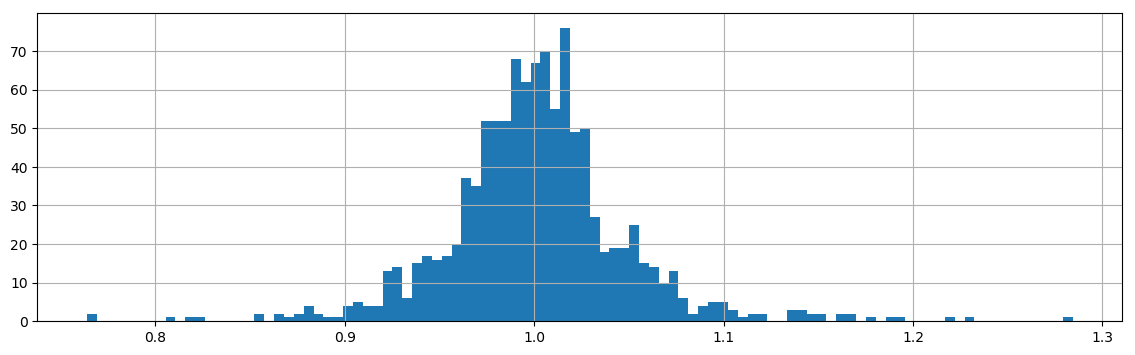

1.049174715263112 0.04805941897641925 1.0011152962866927 1.000369205051749 ModeResult(mode=array([1.01205884]), count=array([2]))
1.0631299654679554 0.06722683507267484 0.9959031303952806 0.9956806219148171 ModeResult(mode=array([0.84029272]), count=array([2]))
1.063731072002843 0.054279602935657034 1.009451469067186 1.00451984741163 ModeResult(mode=array([0.95387645]), count=array([2]))
1.0136040727841955


In [126]:
ratio = []
crf = []
crp = []
tempData = tempStock['FB']
i = 0
limit = (int)(0.7*tempData.shape[0])
tempData = tempData.iloc[:limit]
while(True):
    tempL = tempData.iloc[i:i+10].values
    tempR = tempData.iloc[i+11:i+21].values
    ratio += list((np.mean(tempL/tempData.iloc[i+10])*tempR)/(np.mean(tempR/tempData.iloc[i+10])*tempL))
    crf += list(tempR/tempData.iloc[i+10])
    crp += list(tempL/tempData.iloc[i+10])
    i += 10
    if(i+21>len(tempData)):
        break
print (len(ratio))
plt.figure(figsize=(14,4))
plt.grid()
plt.hist(ratio,bins=100)
plt.show()
print (np.mean(ratio) + np.std(ratio),np.std(ratio),np.mean(ratio),np.median(ratio),stats.mode(ratio))
ratio = np.array(ratio)
crp = np.array(crp)
print (np.mean(crp) + np.std(crp),np.std(crp),np.mean(crp),np.median(crp),stats.mode(crp))
crf = np.array(crf)
print (np.mean(crf) + np.std(crf),np.std(crf),np.mean(crf),np.median(crf),stats.mode(crf))
print(np.mean(crf)/np.mean(crp))
# print (len(ratio[ratio>1]),len(ratio[ratio<1]))
# print (np.mean(ratio[ratio>1]))

In [144]:
amznRes = pd.read_csv('./Results/AMZN/M1V1.csv')
mean_absolute_error(amznRes['Ground truth'],amznRes['Model Predictions']*2*1.0924)#1.0160146003839123)

14.19453983887766

In [145]:
amznRes = pd.read_csv('./Results/AMZN/M3V1.csv')
mean_absolute_error(amznRes['Ground truth'],amznRes['Model Predictions'])

13.459155045936157

In [143]:
tempStock

,Date,AMZN,FB,WMT,PFE,DNB
0,2012-05-18,213.850006,38.230000,62.430000,22.570000,68.239998
1,2012-05-21,218.110001,34.029999,63.040001,22.540001,69.620003
2,2012-05-22,215.330002,31.000000,63.730000,22.370001,68.449997
3,2012-05-23,217.279999,32.000000,64.580002,22.090000,67.110001
4,2012-05-24,215.240005,33.029999,65.070000,22.139999,66.800003
5,2012-05-25,212.889999,31.910000,65.309998,22.129999,67.139999
6,2012-05-29,214.750000,28.840000,65.680000,22.180000,68.379997
7,2012-05-30,209.229996,28.190001,65.440002,22.040001,67.000000
8,2012-05-31,212.910004,29.600000,65.820000,21.870001,67.570000
9,2012-06-01,208.220001,27.719999,65.550003,21.639999,65.650002


In [154]:
tempStock.iloc[1561-465:1562]

,Date,AMZN,FB,WMT,PFE,DNB
1096,2016-09-27,816.109985,128.690002,72.330002,33.830002,135.050003
1097,2016-09-28,828.719971,129.229996,71.790001,33.990002,135.919998
1098,2016-09-29,829.049988,128.089996,70.730003,33.320000,134.720001
1099,2016-09-30,837.309998,128.270004,72.120003,33.869999,136.619995
1100,2016-10-03,836.739990,128.770004,72.010002,33.680000,135.520004
1101,2016-10-04,834.030029,128.190002,71.750000,33.720001,133.539993
1102,2016-10-05,844.359985,128.470001,71.669998,33.900002,133.039993
1103,2016-10-06,841.659973,128.740005,69.360001,33.650002,132.300003
1104,2016-10-07,839.429993,128.990005,68.699997,33.560001,130.460007
1105,2016-10-10,841.710022,130.240005,67.980003,33.610001,130.259995


In [160]:
tempStock.iloc[-477:]

,Date,AMZN,FB,WMT,PFE,DNB
1096,2016-09-27,816.109985,128.690002,72.330002,33.830002,135.050003
1097,2016-09-28,828.719971,129.229996,71.790001,33.990002,135.919998
1098,2016-09-29,829.049988,128.089996,70.730003,33.320000,134.720001
1099,2016-09-30,837.309998,128.270004,72.120003,33.869999,136.619995
1100,2016-10-03,836.739990,128.770004,72.010002,33.680000,135.520004
1101,2016-10-04,834.030029,128.190002,71.750000,33.720001,133.539993
1102,2016-10-05,844.359985,128.470001,71.669998,33.900002,133.039993
1103,2016-10-06,841.659973,128.740005,69.360001,33.650002,132.300003
1104,2016-10-07,839.429993,128.990005,68.699997,33.560001,130.460007
1105,2016-10-10,841.710022,130.240005,67.980003,33.610001,130.259995


In [146]:
print (len(amznRes))
amznRes

466


,Ground truth,Model Predictions,Linear Reg
0,816.109985,804.382385,796.598816
1,828.719971,818.999084,811.053650
2,829.049988,830.150818,822.081909
3,837.309998,832.770874,824.672913
4,836.739990,840.948914,832.760437
5,834.030029,841.870544,833.671875
6,844.359985,838.848389,830.683167
7,841.659973,848.073303,839.805908
8,839.429993,847.209045,838.951233
9,841.710022,846.344177,838.095947


In [151]:
tempStock[tempStock.AMZN ==1813.030029]

,Date,AMZN,FB,WMT,PFE,DNB
1547,2018-07-13,1813.030029,207.320007,87.699997,37.529999,127.449997


<Figure size 640x480 with 0 Axes>

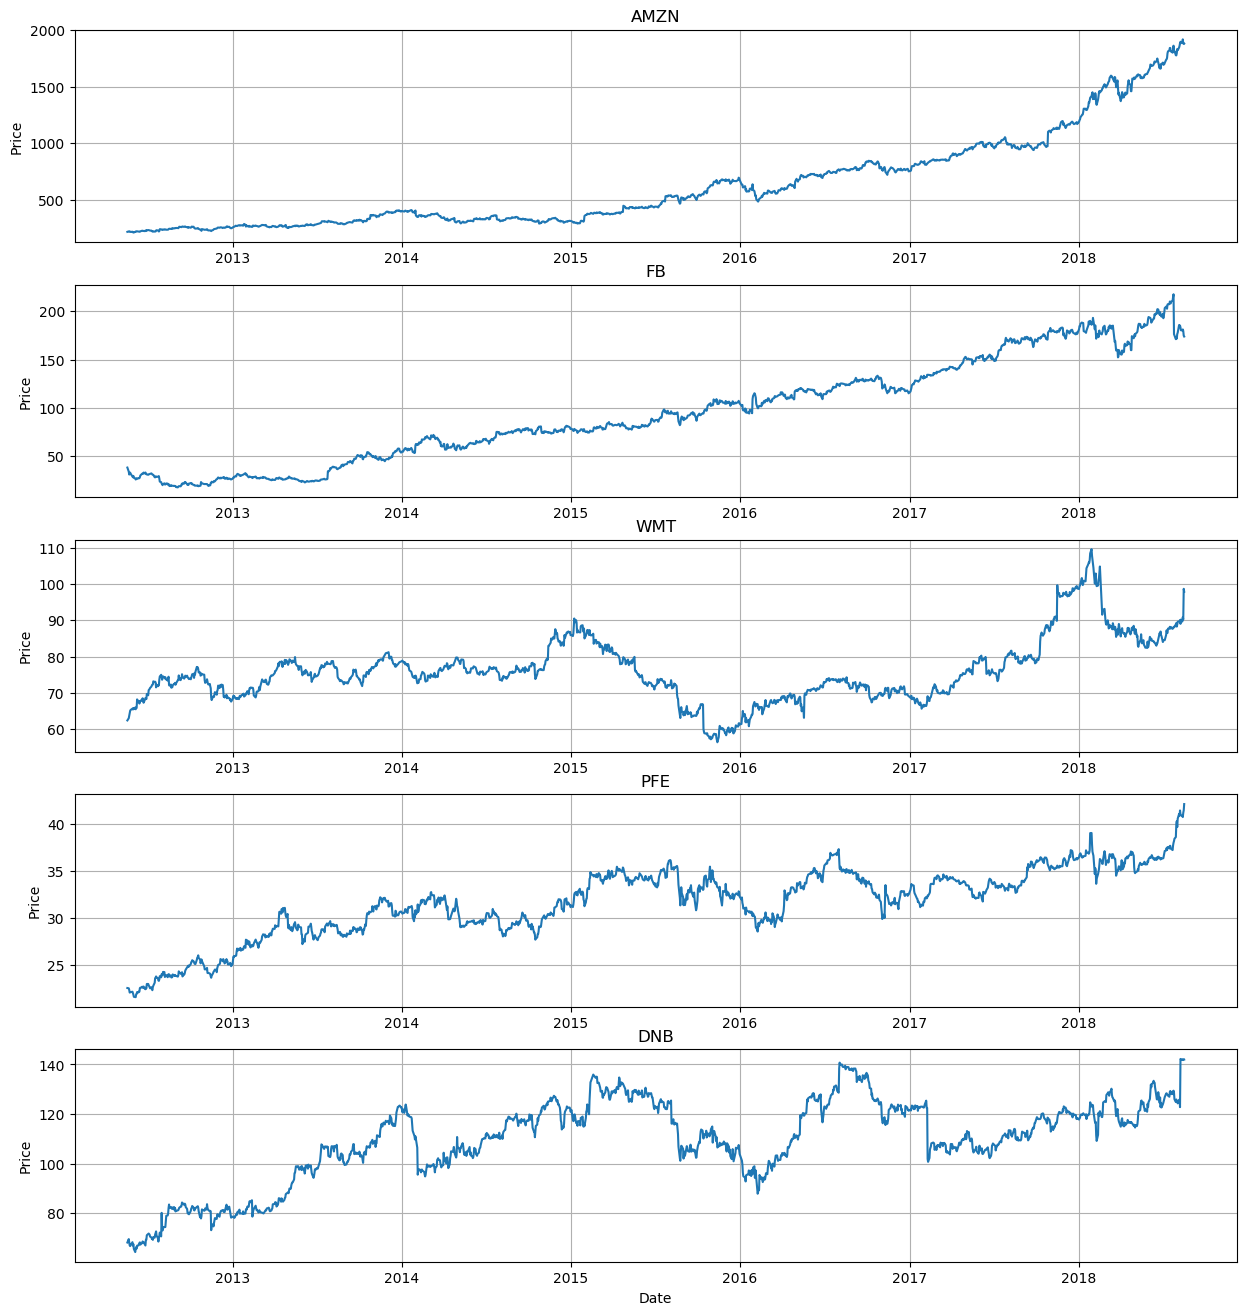

In [155]:
plt.figure()
plt.clf()
plt.style.use('default')
stockData = tempStock
fig,ax = plt.subplots(nrows=len(stockData.columns)-1,ncols=1,figsize=(15,16))
for i in range(len(stockData.columns)-1):
    ax[i].plot(stockData.Date,stockData.iloc[:,i+1])
    ax[i].set_title(stockData.columns[i+1])
    ax[i].set_ylabel('Price')
    ax[i].grid()

ax[i].set_xlabel('Date')
plt.show()

/mnt/home/divi/.local/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/home/divi/.local/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


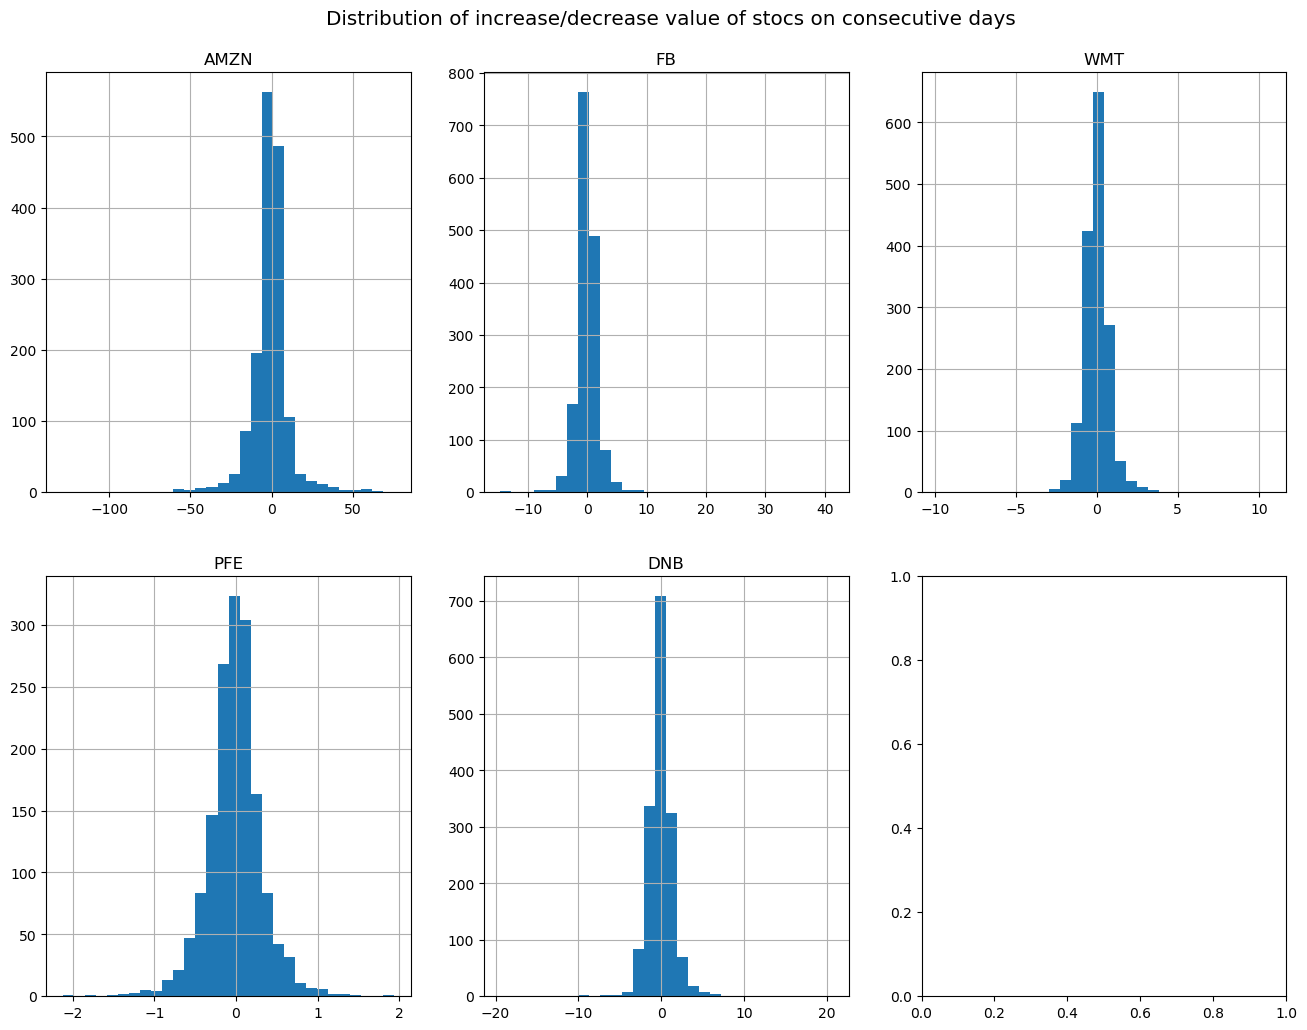

In [156]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(16,12))
fig.text(0.30,0.92,'Distribution of increase/decrease value of stocs on consecutive days',fontsize='x-large')
for i in range(len(stockData.columns)-1):
    tempData = stockData[['Date',stockData.columns[i+1]]]
    tempData.columns = ['Date','stock']
    tempData['stock1'] = tempData.stock.shift(1)
    tempData['difference'] = tempData.stock1 - tempData.stock
    row = (int)(i/3)
    ax[row][i%3].grid(True)
    ax[row][i%3].set_title(stockData.columns[i+1])
    ax[row][i%3].hist(tempData.difference.iloc[1:],bins=30)
plt.show()

In [161]:
stockPredData = []
for j in stockData.columns[1:]:
    tempData = pd.read_csv('./Results/'+j+'/M1V1.csv')
    tempData['Date'] = None
    for i in range(466):
        tempData.loc[tempData.index == i,'Date'] = stockData.Date.dt.date.iloc[-477+i]
    tempData = tempData[['Date','Ground truth', 'Model Predictions', 'Linear Reg']]
    tempData['Name'] = j
    stockPredData.append(tempData)
stockPredData = pd.concat(stockPredData,axis=0)

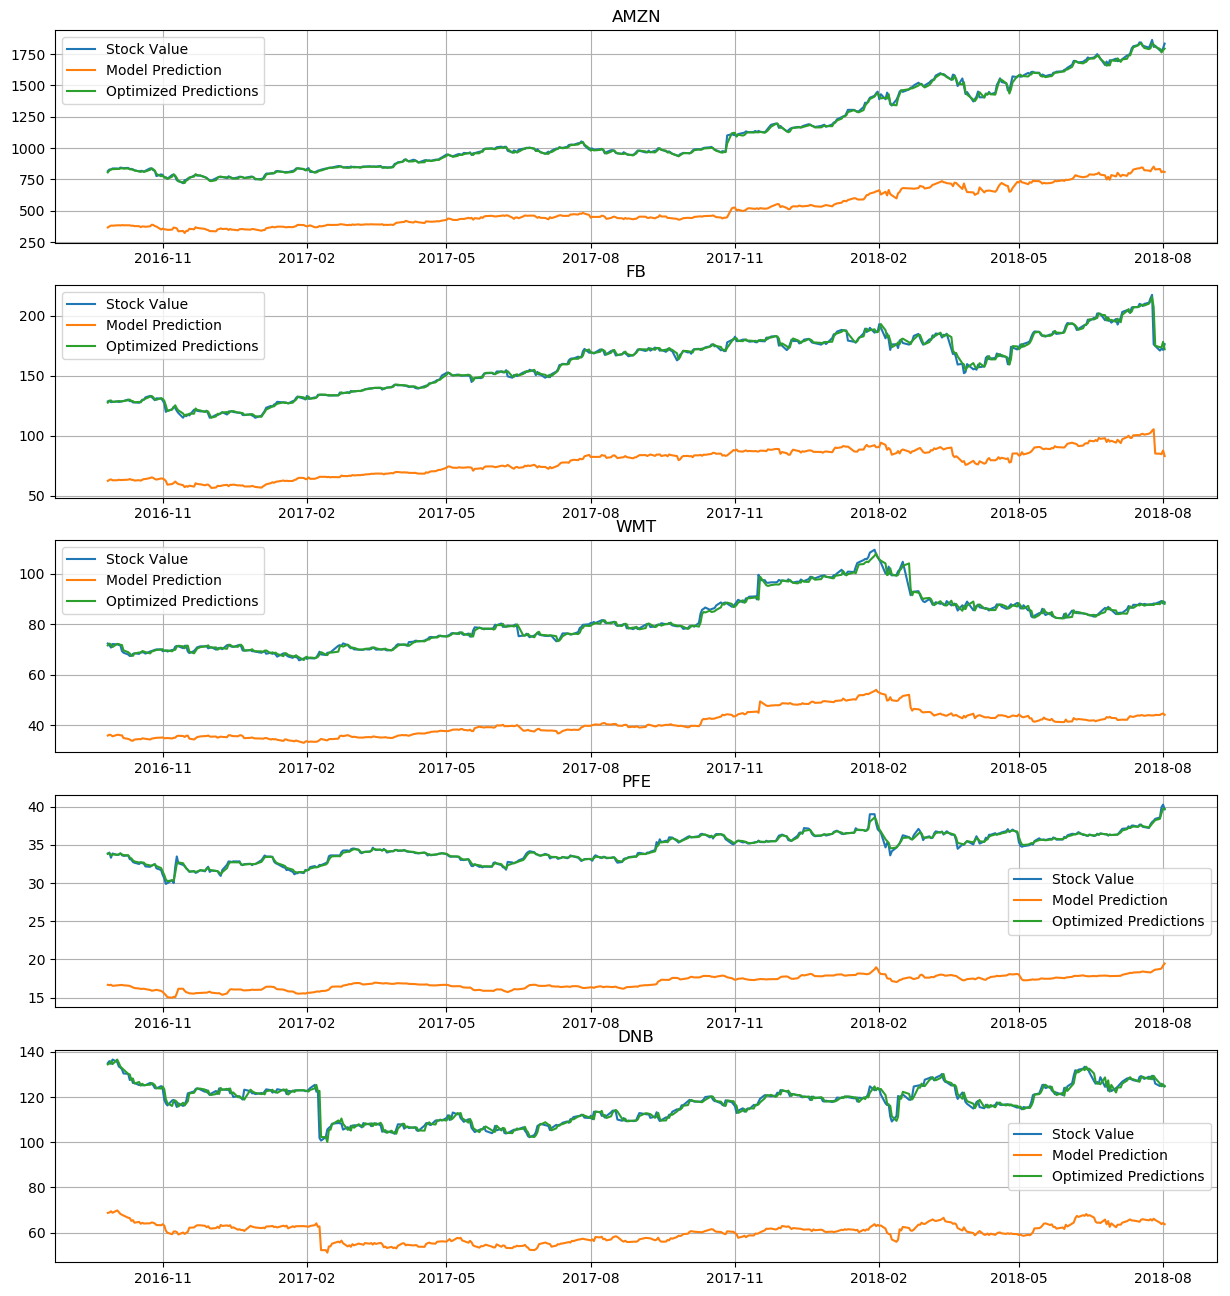

In [166]:

fig,axes = plt.subplots(ncols=1,nrows=5,figsize=(15,16))
for i in range(5):
    tempData = stockPredData[stockPredData.Name == stockData.columns[i+1]]
    axes[i].set_title(stockData.columns[i+1])
    axes[i].grid()
    axes[i].plot(tempData['Date'],tempData['Ground truth'],label='Stock Value')
    axes[i].plot(tempData['Date'],tempData['Model Predictions'],label='Model Prediction')
    axes[i].plot(tempData['Date'],tempData['Linear Reg'],label='Optimized Predictions')
    axes[i].legend()
plt.show()


AMZN


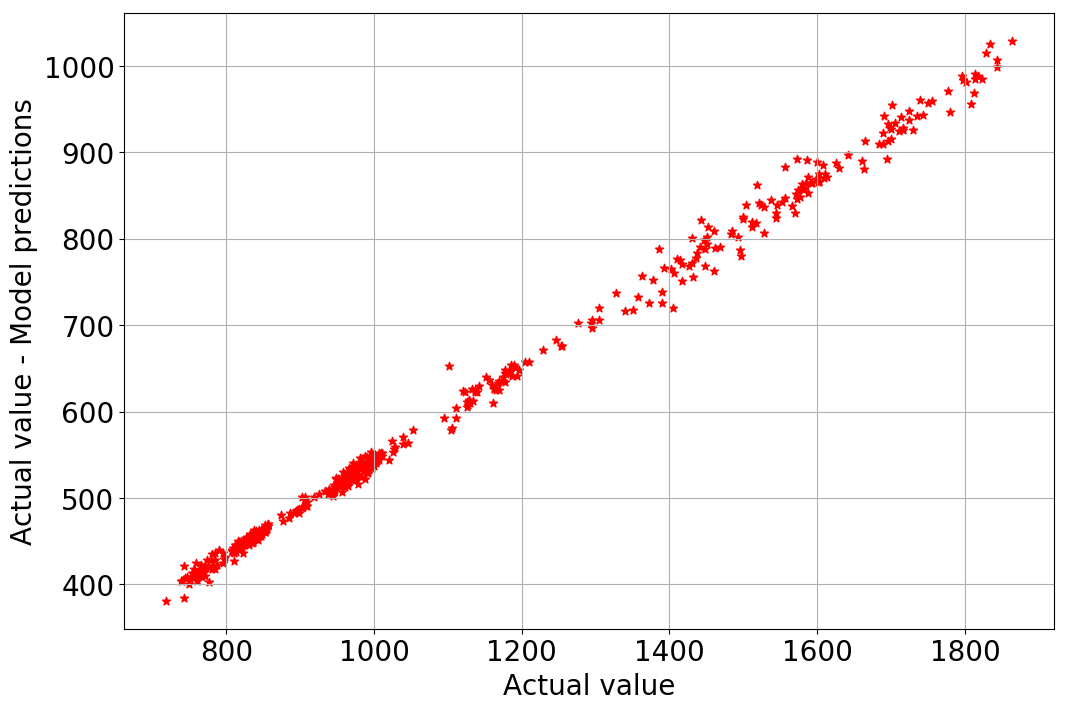

FB


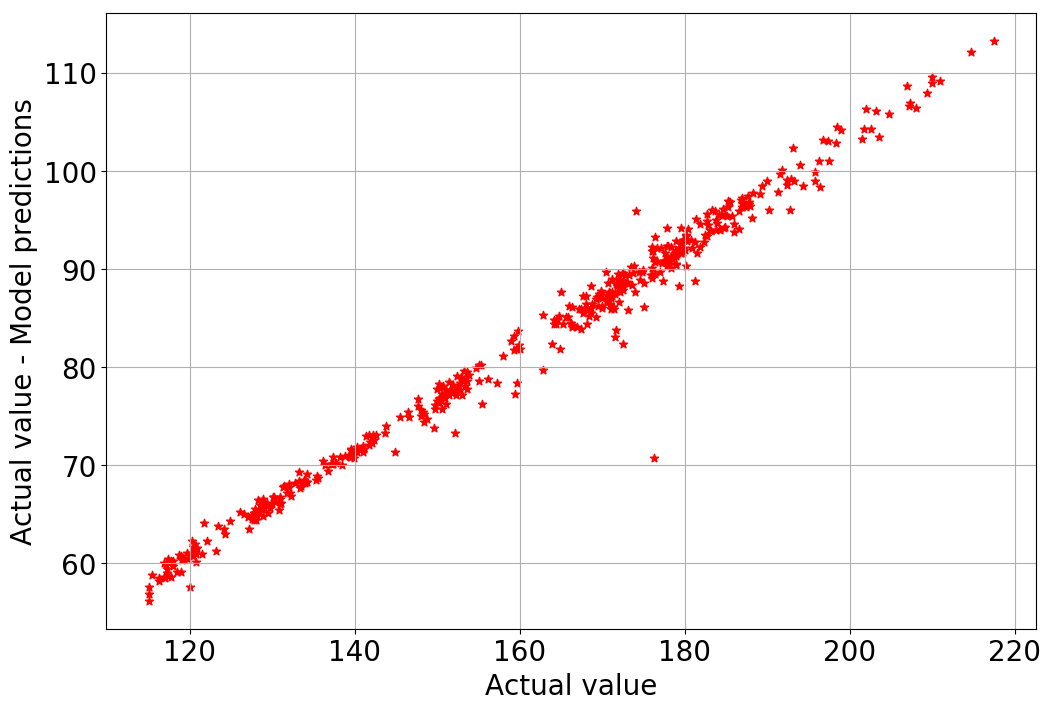

WMT


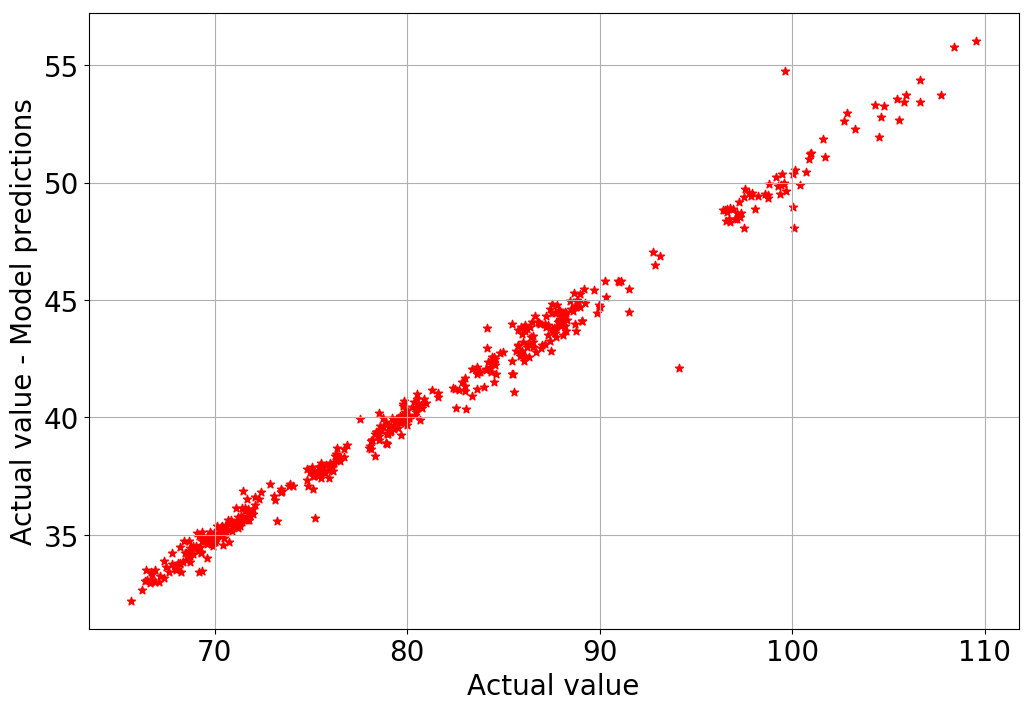

PFE


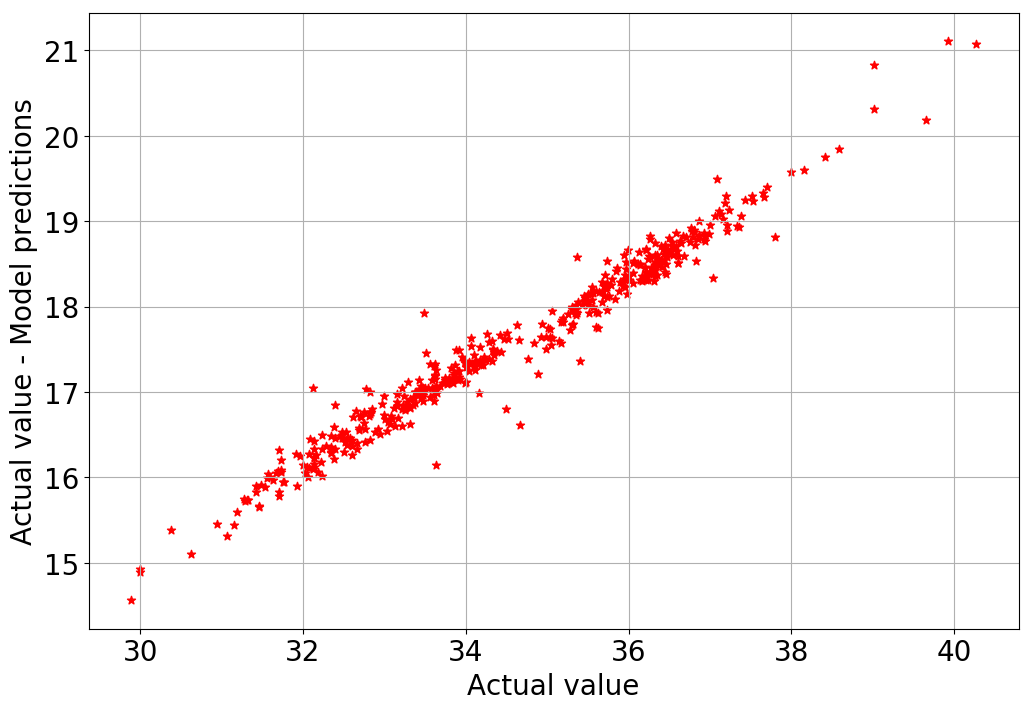

DNB


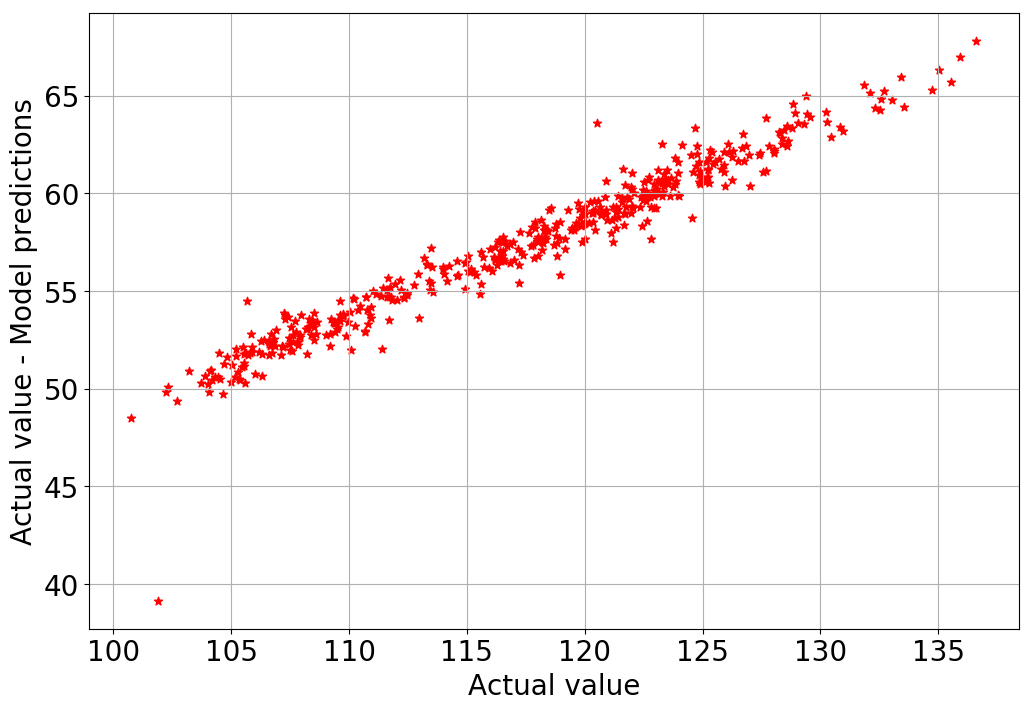

In [187]:
for i in range(5):
    tempData = stockPredData[stockPredData.Name == stockData.columns[i+1]]
    plt.figure(figsize=(12,8))
    plt.clf()
    plt.grid()
    print (stockData.columns[i+1])
    plt.ylabel('Actual value - Model predictions',fontsize=20)
    plt.xlabel('Actual value',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    y = tempData['Ground truth'] - tempData['Model Predictions']
    x = tempData['Ground truth']
    plt.scatter(x,y,marker='*',color='r')
    plt.show()

In [168]:
print (tempData.columns)
tempData.head()

Index(['Date', 'Ground truth', 'Model Predictions', 'Linear Reg', 'Name'], dtype='object')


,Date,Ground truth,Model Predictions,Linear Reg,Name
0,2016-09-27,135.050003,68.743233,134.454956,DNB
1,2016-09-28,135.919998,68.930611,134.820587,DNB
2,2016-09-29,134.720001,69.453293,135.840485,DNB
3,2016-09-30,136.619995,68.812340,134.589813,DNB
4,2016-10-03,135.520004,69.840012,136.595062,DNB


In [169]:
tempData.head()

,Date,Ground truth,Model Predictions,Linear Reg,Name
0,2016-09-27,135.050003,68.743233,134.454956,DNB
1,2016-09-28,135.919998,68.930611,134.820587,DNB
2,2016-09-29,134.720001,69.453293,135.840485,DNB
3,2016-09-30,136.619995,68.812340,134.589813,DNB
4,2016-10-03,135.520004,69.840012,136.595062,DNB


/mnt/home/divi/.local/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/mnt/home/divi/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


During first dips MAE:  5.1852117552697505
Overall MAE 	:  8.218156738298012


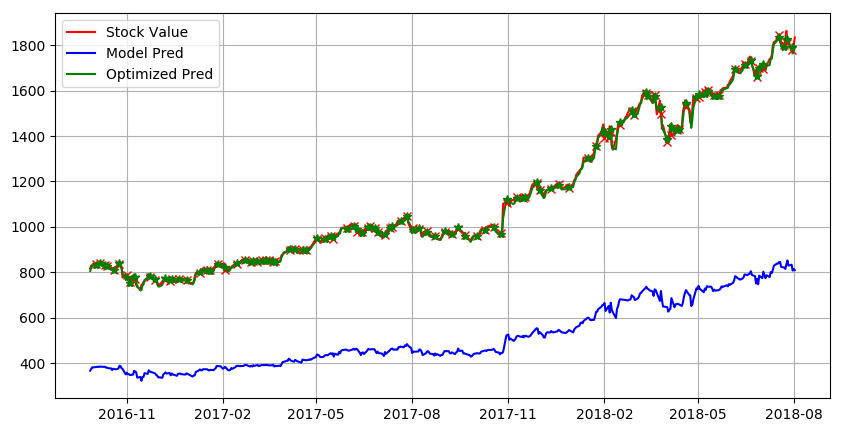

During first dips MAE:  1.6987288272903747
Overall MAE 	:  1.3662939687112299


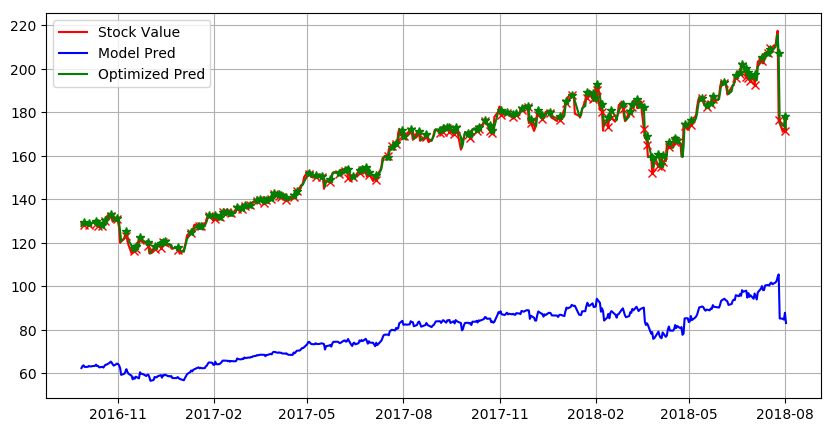

During first dips MAE:  0.6943705894111495
Overall MAE 	:  0.7202843135383833


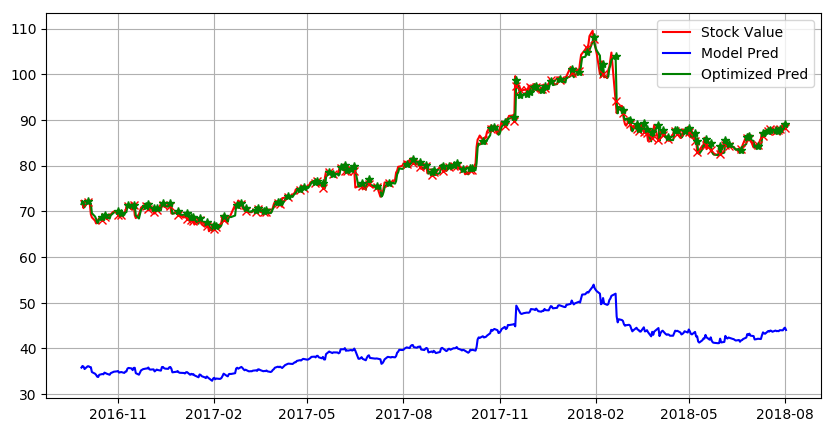

During first dips MAE:  0.09032327237412129
Overall MAE 	:  0.1346791442167749


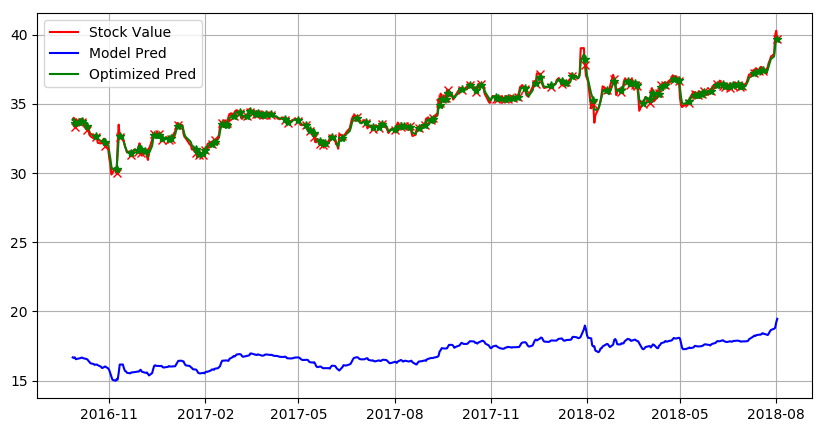

During first dips MAE:  1.1609044196312301
Overall MAE 	:  1.0907020907102916


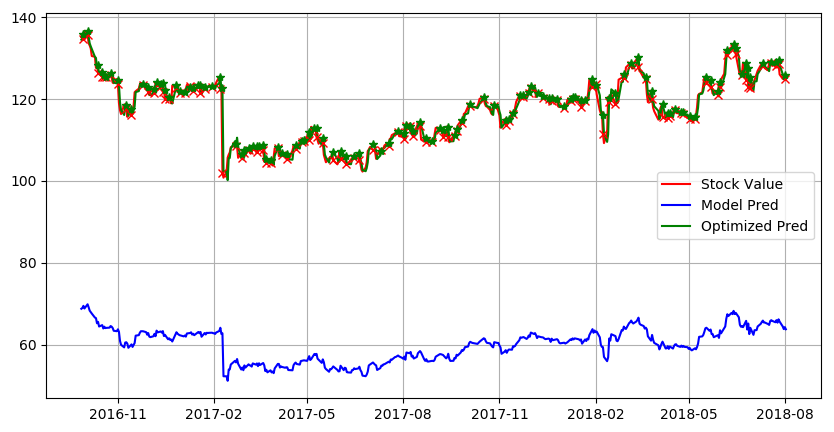

In [171]:
for i in range(5):
    tempData = stockPredData[stockPredData.Name == stockData.columns[i+1]]
    tempData['Ground truth1'] = tempData['Ground truth'].shift(1)
    tempData['Ground truth2'] = tempData['Ground truth'].shift(2)
    tempData = tempData[['Date', 'Ground truth2', 'Ground truth1', 'Ground truth', 'Model Predictions', 'Linear Reg', 'Name']]
    firstDips = tempData[(tempData['Ground truth1']>=tempData['Ground truth2'])&(tempData['Ground truth']<=tempData['Ground truth1'])]
    print ('During first dips MAE: ',mean_absolute_error(firstDips['Ground truth'],firstDips['Linear Reg']))
    print ('Overall MAE \t: ',mean_absolute_error(tempData['Ground truth'],tempData['Linear Reg']))
    plt.figure(figsize=(10,5))
    plt.clf()
    plt.grid()
    plt.plot(tempData['Date'],tempData['Ground truth'],label='Stock Value',color='r')
    plt.plot(tempData['Date'],tempData['Model Predictions'],label='Model Pred',color='b')
    plt.plot(tempData['Date'],tempData['Linear Reg'],label='Optimized Pred',color='g')
    plt.legend()
    plt.plot(firstDips['Date'],firstDips['Ground truth'],linestyle='None',marker='x',color='r',label=None)
    plt.plot(firstDips['Date'],firstDips['Linear Reg'],linestyle='None',marker='*',color='g',label=None)

    plt.show()

/mnt/home/divi/.local/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/mnt/home/divi/.local/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


During first spike MAE:  12.118427760539516
Overall MAE 	:  8.218156738298012


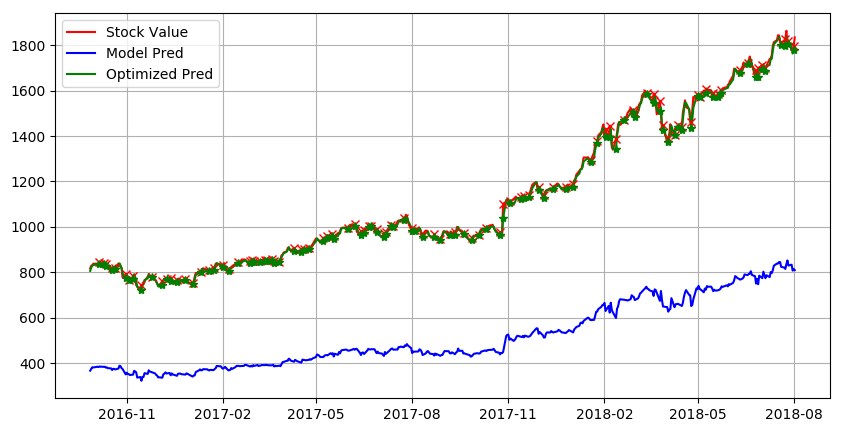

During first spike MAE:  1.1439180066449106
Overall MAE 	:  1.3662939687112299


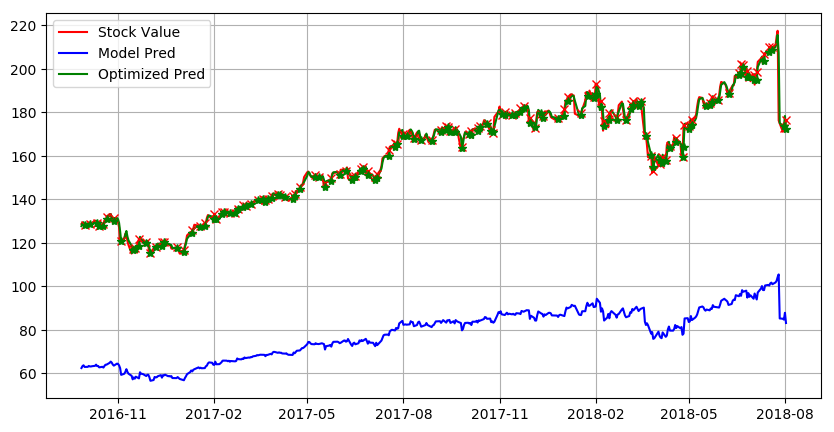

During first spike MAE:  0.7353585472571327
Overall MAE 	:  0.7202843135383833


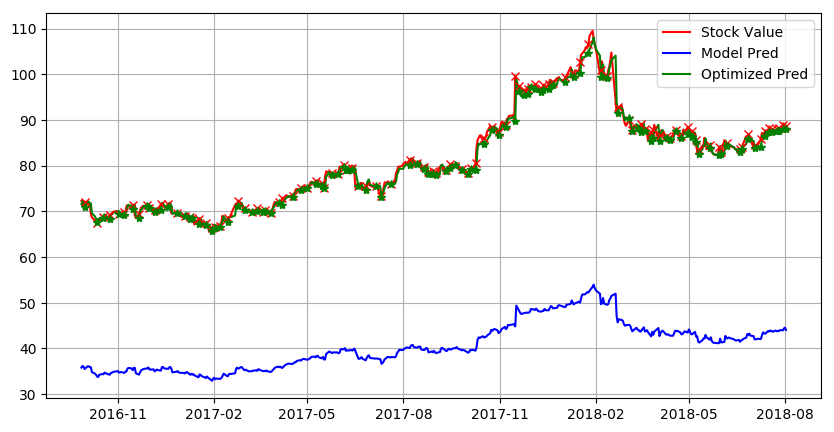

During first spike MAE:  0.10648389120751019
Overall MAE 	:  0.1346791442167749


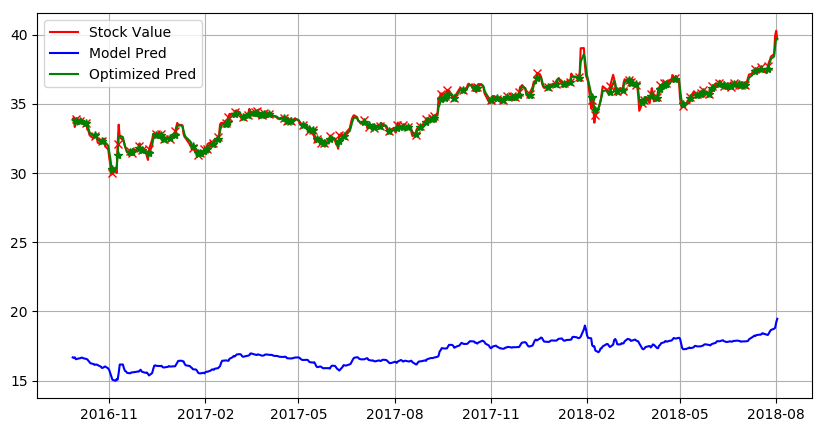

During first spike MAE:  1.015326605921875
Overall MAE 	:  1.0907020907102916


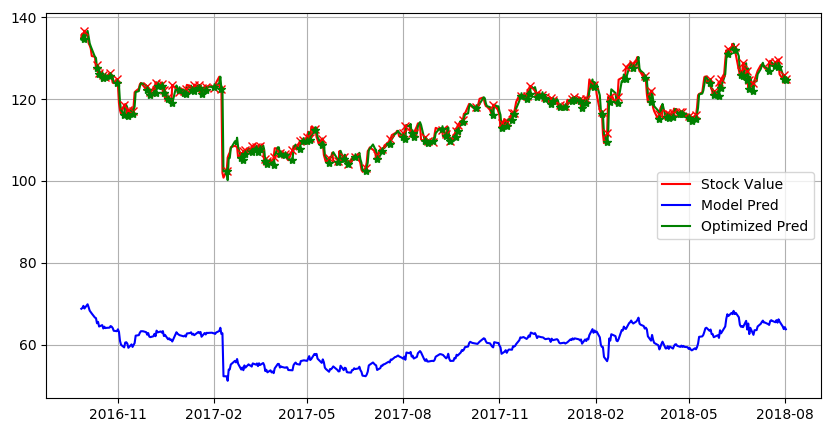

In [172]:
for i in range(5):
    tempData = stockPredData[stockPredData.Name == stockData.columns[i+1]]
    tempData['Ground truth1'] = tempData['Ground truth'].shift(1)
    tempData['Ground truth2'] = tempData['Ground truth'].shift(2)
    tempData = tempData[['Date', 'Ground truth2', 'Ground truth1', 'Ground truth', 'Model Predictions', 'Linear Reg', 'Name']]
    firstSpikes = tempData[(tempData['Ground truth1']<=tempData['Ground truth2'])&(tempData['Ground truth']>=tempData['Ground truth1'])]
    print ('During first spike MAE: ',mean_absolute_error(firstSpikes['Ground truth'],firstSpikes['Linear Reg']))
    print ('Overall MAE \t: ',mean_absolute_error(tempData['Ground truth'],tempData['Linear Reg']))
    plt.figure(figsize=(10,5))
    plt.clf()
    plt.grid()
    plt.plot(tempData['Date'],tempData['Ground truth'],label='Stock Value',color='r')
    plt.plot(tempData['Date'],tempData['Model Predictions'],label='Model Pred',color='b')
    plt.plot(tempData['Date'],tempData['Linear Reg'],label='Optimized Pred',color='g')
    plt.legend()
    plt.plot(firstSpikes['Date'],firstSpikes['Ground truth'],linestyle='None',marker='x',color='r',label=None)
    plt.plot(firstSpikes['Date'],firstSpikes['Linear Reg'],linestyle='None',marker='*',color='g',label=None)

    plt.show()


# Jena dataset

In [177]:
jena = pd.read_csv('./Results/Jena/M1V1.csv')
jena

,Ground truth,Model Predictions,Linear Reg
0,2.905625,0.619120,1.562640
1,-2.132083,1.275114,2.808260
2,-4.296944,-0.806505,-1.144378
3,-3.525486,-1.972517,-3.358435
4,-3.398403,-1.883609,-3.189614
5,0.603194,-2.263000,-3.910013
6,2.158333,0.681195,1.680511
7,3.094653,1.112984,2.500403
8,3.702847,1.564871,3.358460
9,2.115556,2.685364,5.486084


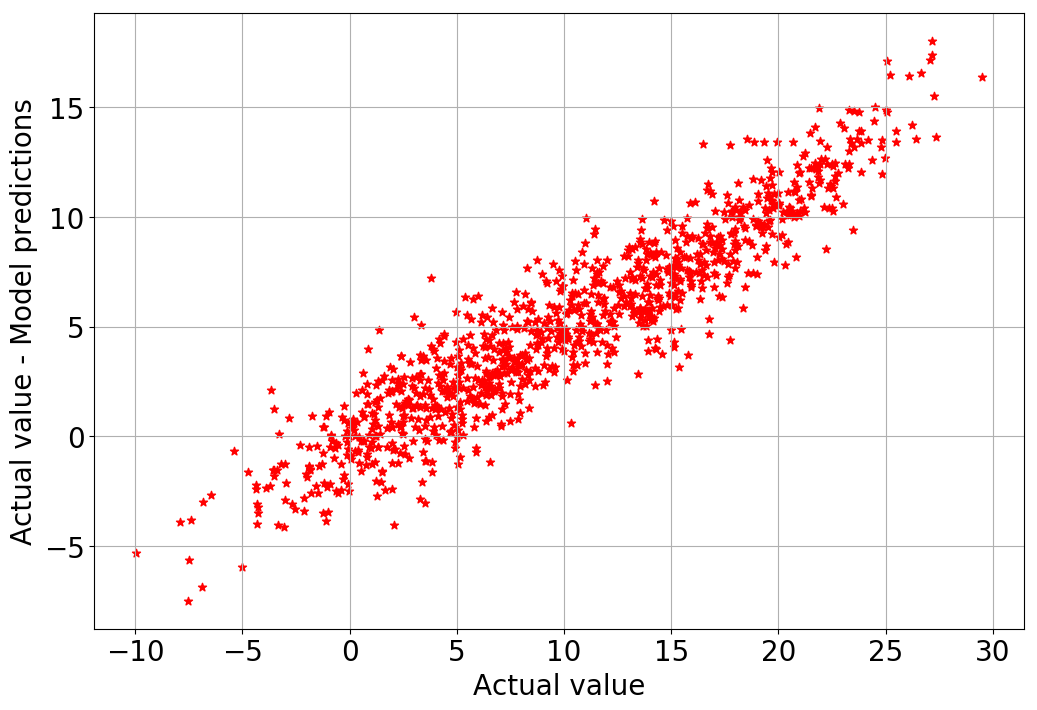

In [188]:
tempData = jena
plt.figure(figsize=(12,8))
plt.clf()
plt.grid()
#plt.title('Difference between model prediction and actual value vs Model Pred - Jena dataset')
plt.ylabel('Actual value - Model predictions',fontsize=20)
plt.xlabel('Actual value',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
y = tempData['Ground truth'] - tempData['Model Predictions']
x = tempData['Ground truth']
plt.scatter(x,y,marker='*',color='r')
plt.show()

# Global Temp

In [205]:
globalTemp = pd.read_csv('./GlobalLandTemperatures_GlobalTemperatures.csv')
val = globalTemp[['dt','LandAverageTemperature']]
val.dt = pd.to_datetime(val.dt)

/opt/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


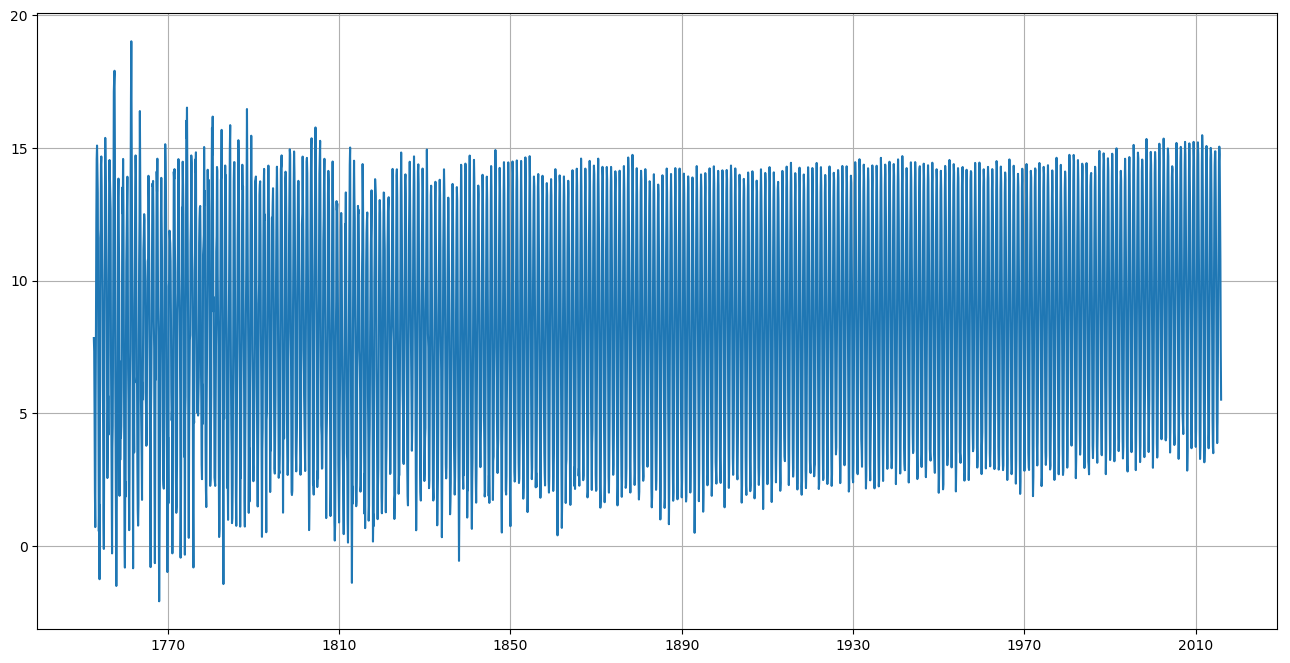

In [207]:
plt.figure(figsize = (16,8))
plt.grid()
plt.plot(val.dt.iloc[33:],val.LandAverageTemperature.iloc[33:])
plt.show()

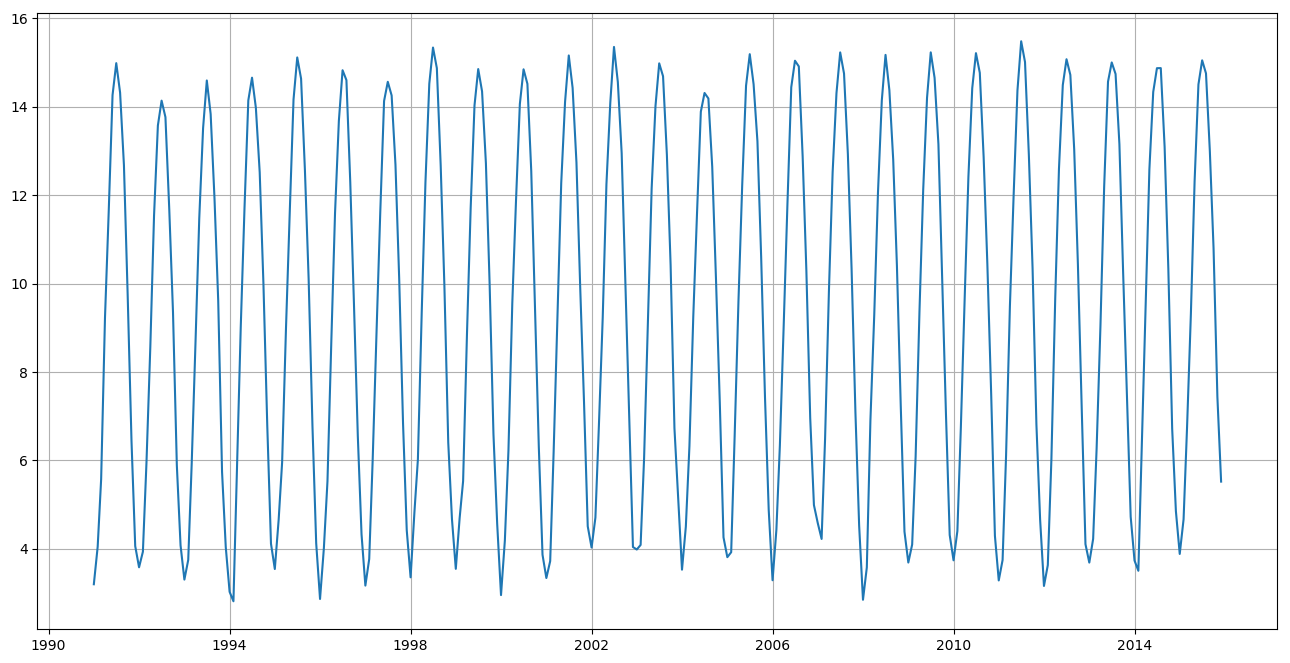

In [208]:
plt.figure(figsize = (16,8))
plt.grid()
plt.plot(val.dt.iloc[-300:],val.LandAverageTemperature.iloc[-300:])
plt.show()

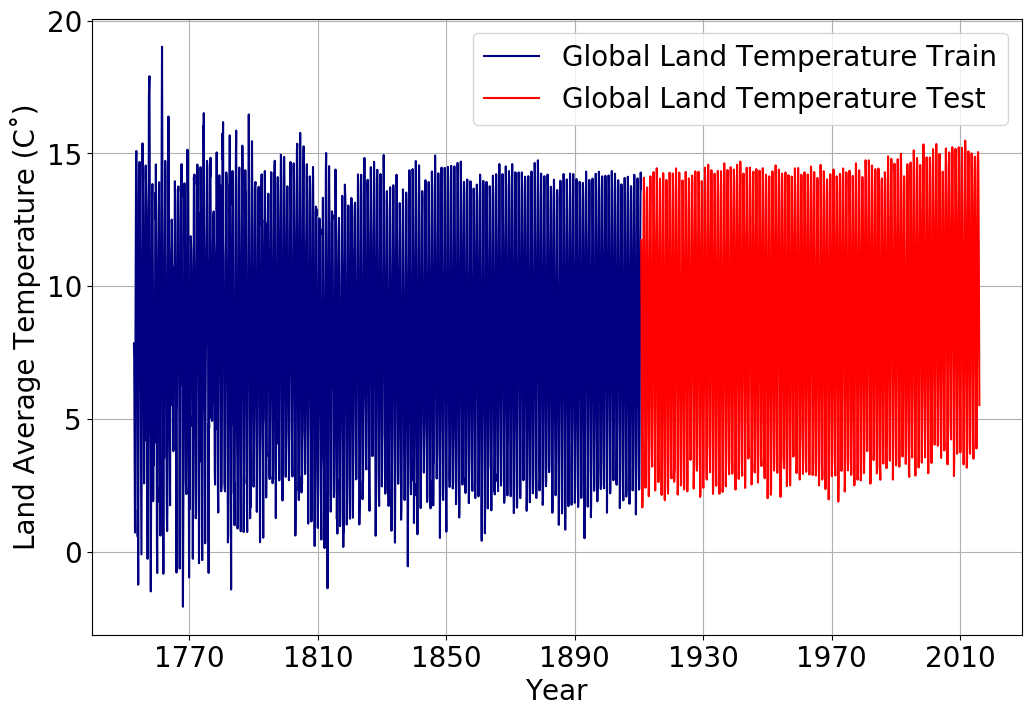

In [276]:
plt.figure(figsize = (12,8))
plt.grid()
plt.ylabel('Land Average Temperature (C˚)',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(val.dt.iloc[33:1895+33],val.LandAverageTemperature.iloc[33:1895+33],color='navy',label='Global Land Temperature Train')
plt.plot(val.dt.iloc[1895+33:],val.LandAverageTemperature.iloc[1895+33:],color='r',label='Global Land Temperature Test')
plt.legend(fontsize=20)
plt.show()

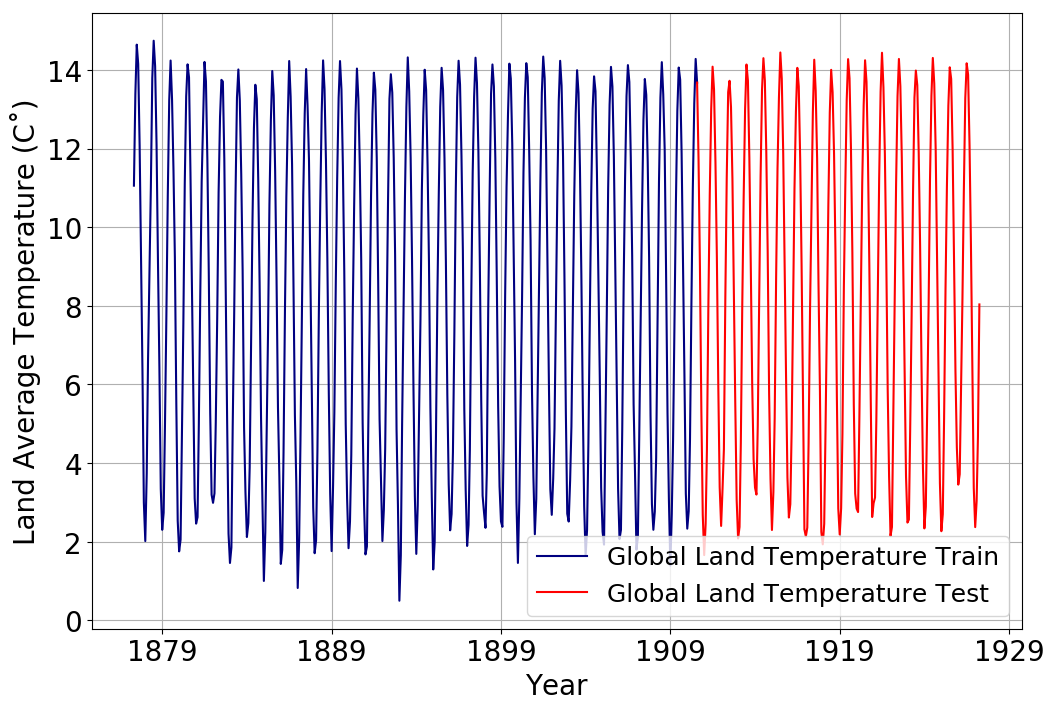

In [277]:
plt.figure(figsize = (12,8))
plt.grid()
plt.ylabel('Land Average Temperature (C˚)',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(val.dt.iloc[1495+33:1895+33],val.LandAverageTemperature.iloc[1495+33:1895+33],color='navy',label='Global Land Temperature Train')
plt.plot(val.dt.iloc[1895+32:2095+33],val.LandAverageTemperature.iloc[1895+32:2095+33],color='r',label='Global Land Temperature Test')
plt.legend(fontsize=18)
plt.show()

In [212]:
tot = 3192 - 33
(int)(0.6*tot)

1895

In [247]:
globalTempRes = pd.read_csv('./Results/GlobalLandTemp/M1V1.csv')
globalTempRes

,Ground truth,Model Predictions,Linear Reg
0,2.506,3.261894,2.834156
1,5.031,4.047040,4.165424
2,8.127,5.393721,6.448810
3,11.251,7.290986,9.665747
4,13.363,9.046090,12.641643
5,14.629,10.099919,14.428479
6,13.860,10.108526,14.443072
7,12.021,8.858237,12.323125
8,9.457,7.045073,9.248785
9,6.233,5.304259,6.297122


In [248]:
globalTempRes['dt'] = globalTemp[-959:-11].dt.values

In [249]:
globalTempRes

,Ground truth,Model Predictions,Linear Reg,dt
0,2.506,3.261894,2.834156,1936-02-01
1,5.031,4.047040,4.165424,1936-03-01
2,8.127,5.393721,6.448810,1936-04-01
3,11.251,7.290986,9.665747,1936-05-01
4,13.363,9.046090,12.641643,1936-06-01
5,14.629,10.099919,14.428479,1936-07-01
6,13.860,10.108526,14.443072,1936-08-01
7,12.021,8.858237,12.323125,1936-09-01
8,9.457,7.045073,9.248785,1936-10-01
9,6.233,5.304259,6.297122,1936-11-01


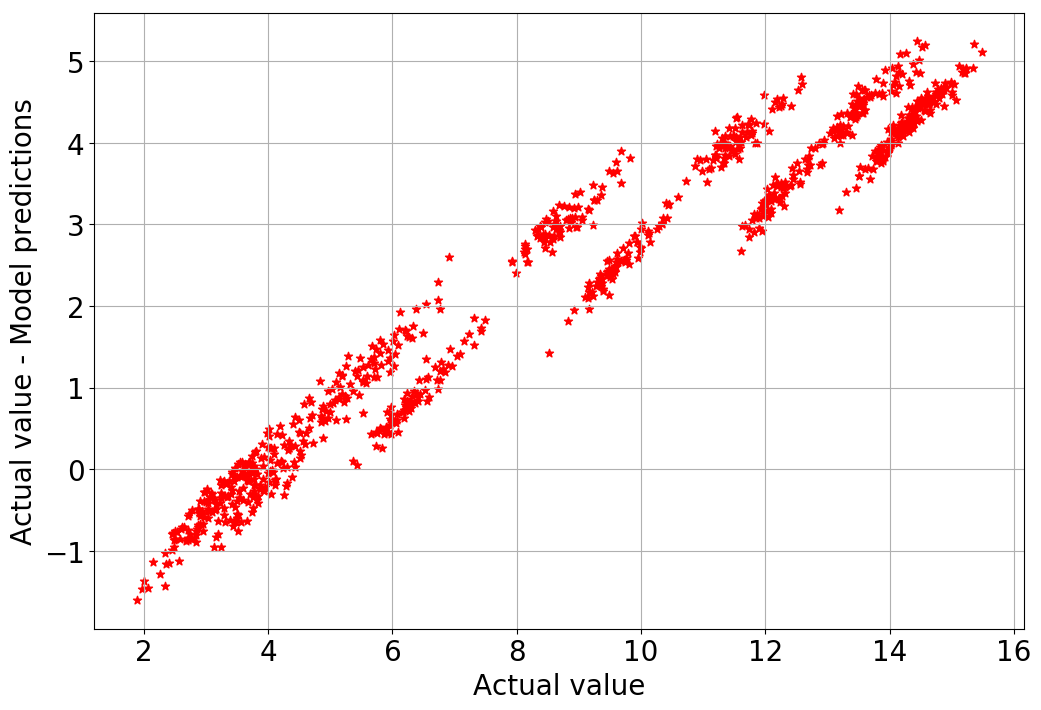

In [250]:
tempData = globalTempRes
plt.figure(figsize=(12,8))
plt.clf()
plt.grid()
#plt.title('Difference between model prediction and actual value vs Model Pred - Jena dataset')
plt.ylabel('Actual value - Model predictions',fontsize=20)
plt.xlabel('Actual value',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
y = tempData['Ground truth'] - tempData['Model Predictions']
x = tempData['Ground truth']
plt.scatter(x,y,marker='*',color='r')
plt.show()

# zurich 

In [257]:
zurich = pd.read_csv('./monthly-sunspot-number-zurich-17.csv')
zurich['Month'] = pd.to_datetime(zurich['Month'])

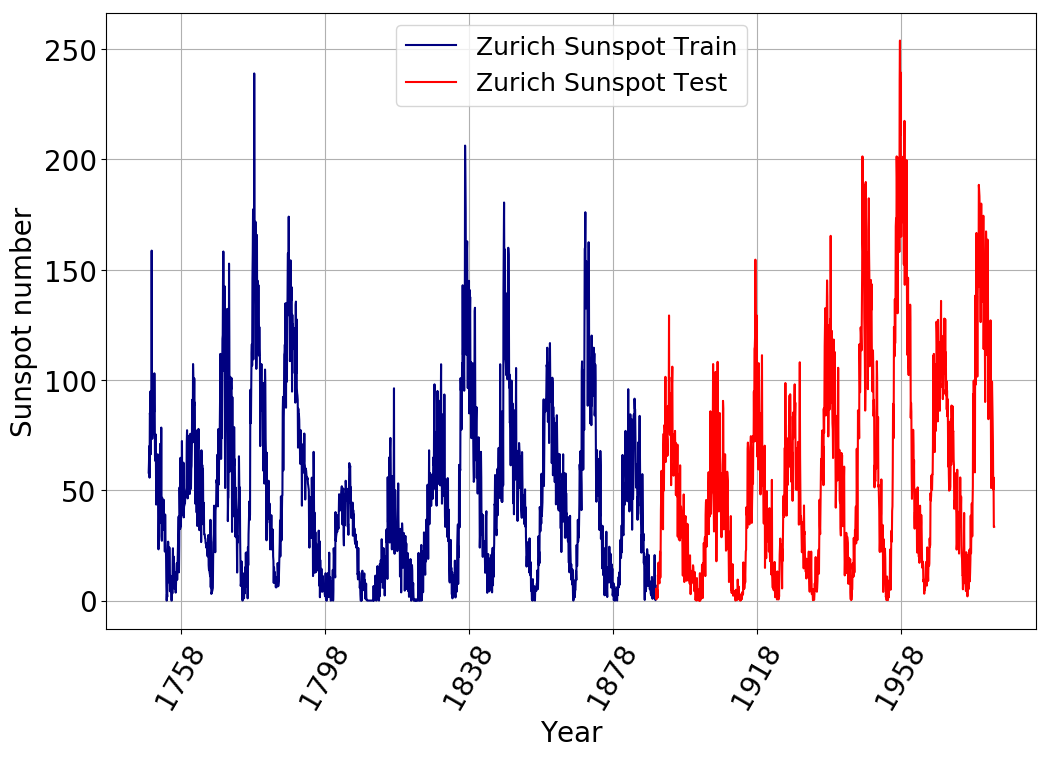

In [284]:
plt.figure(figsize=(12,8))
plt.grid()
plt.ylabel('Sunspot number',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=20,rotation=60)
plt.yticks(fontsize=20)
plt.plot(zurich['Month'].iloc[:1692],zurich['Monthly sunspot number, Zurich, 1749-1983'].iloc[:1692],color='navy',label='Zurich Sunspot Train')
plt.plot(zurich['Month'].iloc[1692:],zurich['Monthly sunspot number, Zurich, 1749-1983'].iloc[1692:],color='r',label='Zurich Sunspot Test')
plt.legend(fontsize=18)
plt.show()

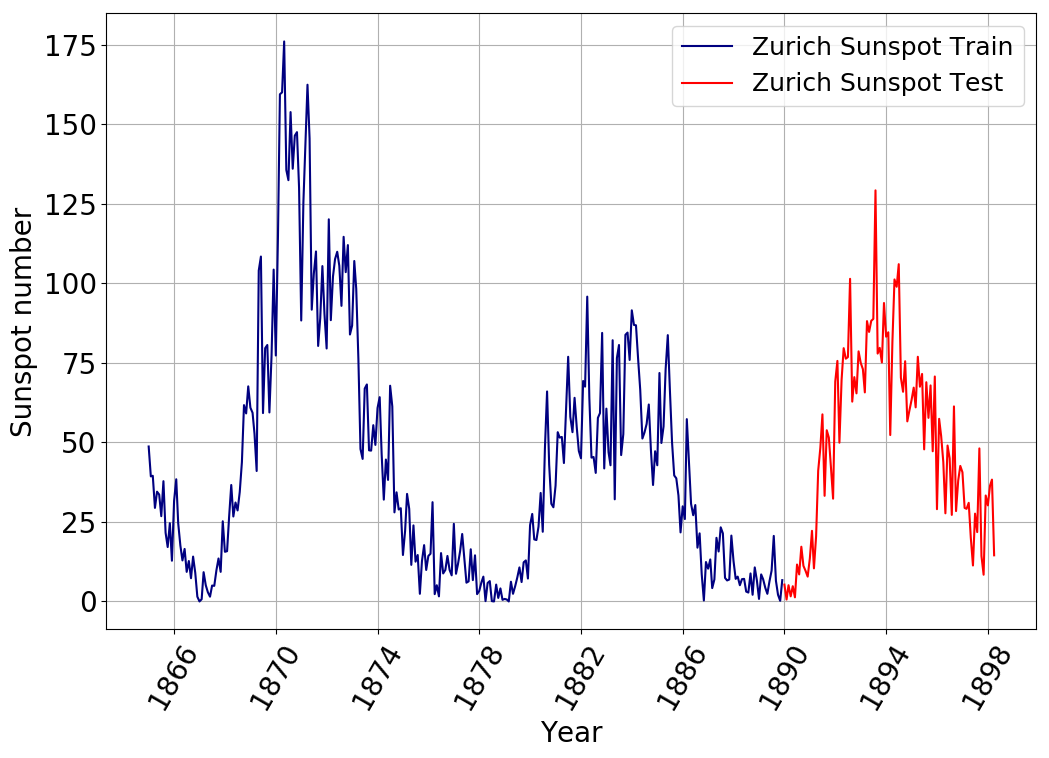

In [286]:
plt.figure(figsize=(12,8))
plt.grid()
plt.ylabel('Sunspot number',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=20,rotation=60)
plt.yticks(fontsize=20)
plt.plot(zurich['Month'].iloc[1392:1692],zurich['Monthly sunspot number, Zurich, 1749-1983'].iloc[1392:1692],color='navy',label='Zurich Sunspot Train')
plt.plot(zurich['Month'].iloc[1692:1792],zurich['Monthly sunspot number, Zurich, 1749-1983'].iloc[1692:1792],color='r',label='Zurich Sunspot Test')
plt.legend(fontsize=18)
plt.show()

In [267]:
zurich.head()

,Month,"Monthly sunspot number, Zurich, 1749-1983"
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [265]:
tot = len(zurich)
(int)(0.6*tot)

1692

In [263]:
zurichRes = pd.read_csv('./Results/Sunspot/M1V1.csv')
zurichRes

,Ground truth,Model Predictions,Linear Reg
0,2.9,0.635185,11.261544
1,0.5,2.646451,15.480593
2,0.9,2.866210,15.941583
3,0.0,-0.008523,9.911233
4,0.0,3.025712,16.276171
5,1.7,-0.257408,9.389144
6,0.2,-0.024297,9.878144
7,1.2,-0.130013,9.656384
8,3.1,-0.137827,9.639991
9,0.7,0.213845,10.377696


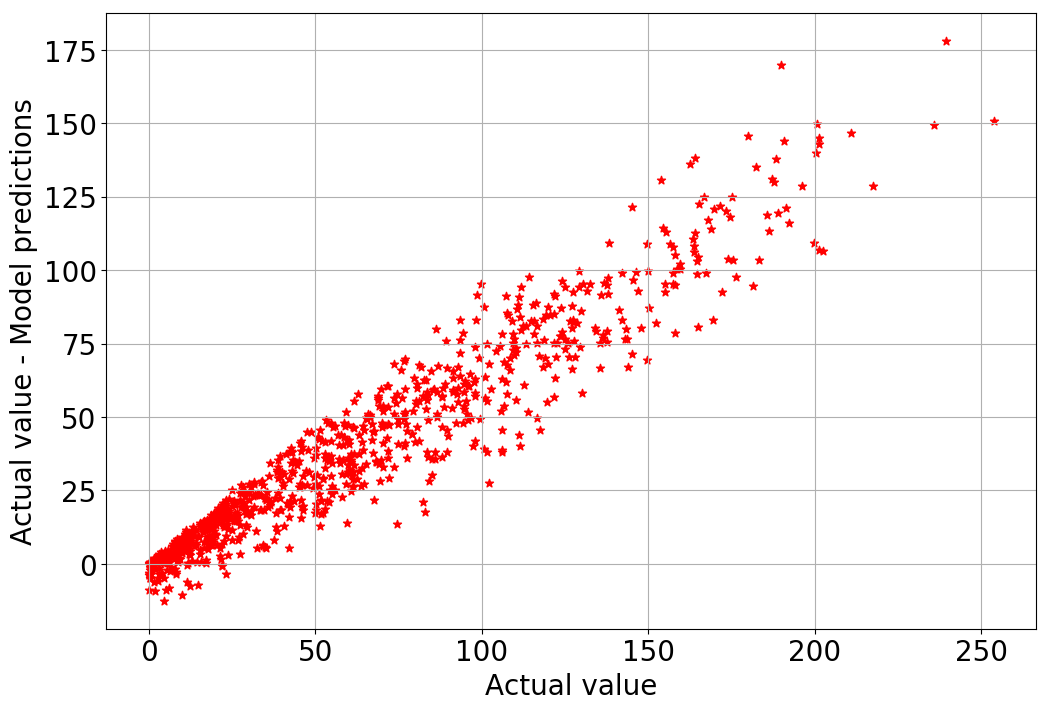

In [264]:
tempData = zurichRes
plt.figure(figsize=(12,8))
plt.clf()
plt.grid()
#plt.title('Difference between model prediction and actual value vs Model Pred - Jena dataset')
plt.ylabel('Actual value - Model predictions',fontsize=20)
plt.xlabel('Actual value',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
y = tempData['Ground truth'] - tempData['Model Predictions']
x = tempData['Ground truth']
plt.scatter(x,y,marker='*',color='r')
plt.show()

# NYC (Incomplete) - Need the predictions

In [15]:
loadData = pd.read_csv('NYC Load Data.csv')
loadData.head()

,Unnamed: 0,Load
0,0,4937.5
1,1,4752.1
2,2,4542.6
3,3,4357.7
4,4,4275.5


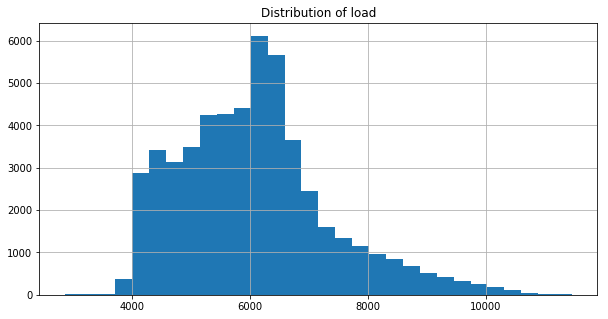

In [16]:
plt.figure(figsize=(10,5))
plt.title('Distribution of load')
loadData.Load.hist(bins=30)

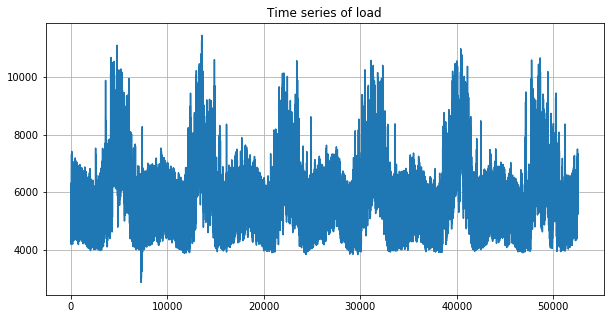

In [17]:
plt.figure(figsize=(10,5))
plt.clf()
plt.grid()
plt.title('Time series of load')
plt.plot(loadData.Load)
plt.show(True)

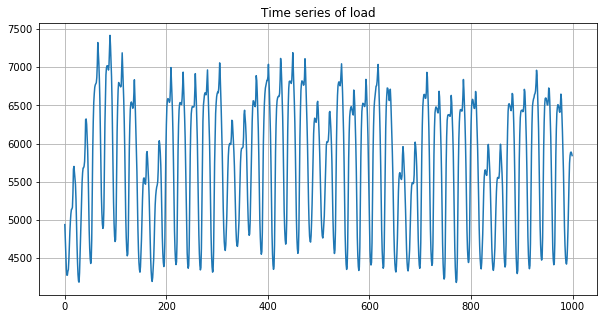

In [18]:
plt.figure(figsize=(10,5))
plt.clf()
plt.grid()
plt.title('Time series of load')
plt.plot(loadData.Load.iloc[:1000])
plt.show(True)

In [23]:
loadData = pkl.load(open('data_for_NYC_seasons.dms','rb'))

In [24]:
loadData.head()

,N.Y.C.,nan,Week_number,dayofweek,Year,Month,Day,Hour,Weekends,Temperature,Humidity,DewPoint,FeelsLikeC,WindChillC,WindspeedKmph,cloudcover,Holidays,Seasons
0,4937.5,0.0,52.0,6.0,2012.0,1.0,1.0,0.0,1.0,6.0,93.0,5.0,3.0,3.0,16.0,40.0,0,2
1,4752.1,0.0,52.0,6.0,2012.0,1.0,1.0,1.0,1.0,5.0,95.0,4.0,2.0,2.0,13.0,60.0,0,2
2,4542.6,0.0,52.0,6.0,2012.0,1.0,1.0,2.0,1.0,4.0,97.0,4.0,2.0,2.0,10.0,80.0,0,2
3,4357.7,0.0,52.0,6.0,2012.0,1.0,1.0,3.0,1.0,3.0,99.0,3.0,1.0,1.0,7.0,100.0,0,2
4,4275.5,0.0,52.0,6.0,2012.0,1.0,1.0,4.0,1.0,3.0,99.0,3.0,1.0,1.0,6.0,100.0,0,2


In [ ]:
loadData['Date'] = str(int(loadData.Year))+'-'+str(int(loadData.Month))+'-'+str(int(loadData.Day))+' '+str(int(loadData.))

In [29]:
pd.to_datetime('2018-2-2 1:00')

Timestamp('2018-02-02 01:00:00')